<a href="https://colab.research.google.com/github/eigeneddie/designScriptsRehabilitationMachine/blob/master/calcsheet_Motor_Sizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Motor Sizing Program**
Copyright (c) 2021 Edgar Sutawika

The purpose of this code is to conduct calculations for motor sizing in robotic applications.

Educational purposes.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Part 1: Useful Functions**
This part defines function to calculate leadscrew/ballscrew efficiencies. Use these functions if you are designing linear actuators.

In [4]:
def LSEfficiency(miu, lead, diameter): # miu [], lead [mm/rev], diameter [mm]

    r = diameter/2 # [mm]
    alpha = np.arctan(lead/(2*np.pi*r))
     
    effLS = (1-miu*np.tan(alpha))/(1+miu*(1/np.tan(alpha)))
    return effLS


def LSEfficiencyACME(miu, lead, diameter, lamda):
    r = diameter/2 # [mm]
    alpha = np.arctan(lead/(2*np.pi*r)) #calculate alpha
    #calculate lamda

    effLSNum = np.cos(lamda)-miu*np.tan(alpha)
    effLSDen = np.cos(lamda)+miu*(1/np.tan(alpha))

    effLS = effLSNum/effLSDen
    return effLS

# **Part 2: Inputs**

a. Input variables: Iterated data

In [5]:
# OBJECTIVE:
# -Determine the motor load in torque-RPM.
# 1. INPUT PARMETERS
# a. iterated Data
lead = 8# mm/rev --> chosen
diameter = 8 # mm --> chosen
miu = 0.2 #friction coefficient --> guess
gearReduction = 1 #gearbox reduction -->
gearEff = 1 #gearbox efficiency, 1 because no gearbox -->


b. Input variables: motor specifications

In [6]:
# b. MOTOR SPECS BRUSHLESS
#https://www.aliexpress.com/item/32857377575.html?spm=a2g0s.9042311.0.0.693c4c4dU4BaAS

Kv = 270 # [RPM/Volt]. Oter values: 270 #330#800 #1000#330
voltage = 12 # [Volt]
internalResistance = 0.020 # [ohm] Other values: 0.020 #0.038#0.035#0.052#0.038
stallTorque = voltage/internalResistance/(Kv*2*np.pi/60) #[N.m]
noLoadSpeed = voltage*Kv #[RPM]'''

In [7]:
#Stepper motor
'''Kt = 3/4.2 #270 # [RPM/Volt]. Oter values: 270 #330#800 #1000#330
voltage = 24 #12 # [Volt]
internalResistance = 0.9 #0.020 # [ohm] Other values: 0.020 #0.038#0.035#0.052#0.038
stallTorque = Kt*voltage/internalResistance #/(Kv*2*np.pi/60) #[N.m]
noLoadSpeed = voltage/Kt*60/2/np.pi # voltage*Kv #[RPM]'''

'Kt = 3/4.2 #270 # [RPM/Volt]. Oter values: 270 #330#800 #1000#330\nvoltage = 24 #12 # [Volt]\ninternalResistance = 0.9 #0.020 # [ohm] Other values: 0.020 #0.038#0.035#0.052#0.038\nstallTorque = Kt*voltage/internalResistance #/(Kv*2*np.pi/60) #[N.m]\nnoLoadSpeed = voltage/Kt*60/2/np.pi # voltage*Kv #[RPM]'

Calculation of speed-torque curve of DC motor based on motor specification

In [8]:
motorTorqueBarang = np.arange(0, stallTorque, 0.001, dtype = float).T # [N.m] 
motorSpeedBarang = (noLoadSpeed - noLoadSpeed/stallTorque*motorTorqueBarang)# [RPM] *60/2/np.pi 

Part 3: Load data and



-53.47986858925909


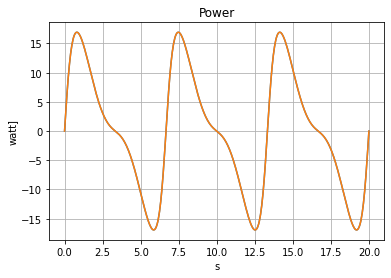

0.5750336958644028
0.5369335719991798
0.3359913563156226
2165.31917454186


' iterating between lead and diameter\nlead_iterateX = np.arange(6, 10, 1)\ndiameter_iterateY = np.arange(6,16,1)\nlead_iterate, diameter_iterate = np.meshgrid(lead_iterateX, diameter_iterateY)\nmaxTorque = np.amax(np.absolute(sliderForce))*(lead/2/np.pi/1000)/cfnc.LSEfficiency(miu, lead_iterate, diameter_iterate)\nmaxTorque = maxTorque/gearReduction/gearEff*10.197162\n\n#plot surface\nfig, ax = plt.subplots(subplot_kw={"projection": "3d"})\nsurf = ax.plot_surface(lead_iterate, diameter_iterate, maxTorque, cmap=cm.coolwarm,\n                       linewidth=0, antialiased=False)\n# Add a color bar which maps values to colors.\nfig.colorbar(surf, shrink=0.5, aspect=5)\nax.set_xlabel(\'lead [mm/rev]\')\nax.set_ylabel(\'diameter [mm]\')\nax.set_zlabel(\'maximum torque [kg.cm]\')\nplt.show()'

In [9]:
# 3. IMPORT LOAD DATA
# b. import force, velocity, power data (mbd calc)
# supply your load trajectory here. In my case, my data is stored in my own google drive,
# so you have to supply your own load trajectory data.
importForce= pd.read_csv('/content/drive/MyDrive/calcdata/sliderForce135kg.csv') #'sliderForce135kg.csv'
importVelocity = pd.read_csv('/content/drive/MyDrive/calcdata/sliderVelocity135kg.csv') #'sliderVelocity135kg.csv'
importPower = pd.read_csv('/content/drive/MyDrive/calcdata/sliderPower135kg.csv') #'sliderPower135kg.csv'

# import data
sliderForce = importForce.actuatingForceNewton # [N]
print(np.average(sliderForce))
timeForce = importForce.time # [s]
sliderVelocity = importVelocity.sliderVelocitymmsec # [mm/s]
timeVel = importVelocity.time # [s]
sliderPower = importPower.actuationPowerWatt # [watt]
timePower = importPower.time # [s]

# validate
sliderPowerCalc = np.multiply(sliderForce, sliderVelocity/1000)
plt.figure()
plt.plot(timeForce, sliderPowerCalc)
plt.plot(timePower, sliderPower)
plt.title('Power')
plt.ylabel('watt]')
plt.xlabel('s')
plt.grid(True)
plt.show()

# 4. Calculating motor torque and angular velocity
motorTorque = sliderForce*(lead/2/np.pi/1000)/LSEfficiency(miu, lead, diameter)# [Nm] LSEfficiency(miu, lead, diameter)
motorTorque = motorTorque/gearReduction/gearEff # [Nm]
motorSpeed = sliderVelocity*gearReduction*60/lead#  [RPM] *2*np.pi

print(LSEfficiency(miu, lead, diameter))
print(LSEfficiencyACME(miu, lead, diameter, 30*np.pi/180))
print(np.amax(abs(motorTorque)))
print(np.amax(abs(motorSpeed)))

''' iterating between lead and diameter
lead_iterateX = np.arange(6, 10, 1)
diameter_iterateY = np.arange(6,16,1)
lead_iterate, diameter_iterate = np.meshgrid(lead_iterateX, diameter_iterateY)
maxTorque = np.amax(np.absolute(sliderForce))*(lead/2/np.pi/1000)/cfnc.LSEfficiency(miu, lead_iterate, diameter_iterate)
maxTorque = maxTorque/gearReduction/gearEff*10.197162

#plot surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(lead_iterate, diameter_iterate, maxTorque, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('lead [mm/rev]')
ax.set_ylabel('diameter [mm]')
ax.set_zlabel('maximum torque [kg.cm]')
plt.show()'''


In [10]:
staticLoad = 500 # N
motorTorqueMax = staticLoad*(lead/2/np.pi/1000)/LSEfficiency(miu, lead, diameter)
#print(1/(Kv*2*np.pi/60))
#maxCurrent = motorTorqueMax/(1/(Kv*2*np.pi/60))
#maxCurrent = motorTorqueMax/Kt
print(motorTorqueMax)
#print(maxCurrent)


1.1070999437878177


In [11]:
stepper_motor_spec = np.array([[30.573248407643334, 2.397683397683398],
                                [87.89808917197452, 2.33976833976834],
                                [208.28025477707013, 2.154440154440155],
                                [301.9108280254777, 2.1660231660231664],
                                [391.71974522293, 1.8648648648648654],
                                [508.2802547770701, 1.563706563706564],
                                [600, 1.2972972972972974],
                                [689.8089171974524, 1.111969111969112],
                                [810.1910828025478, 0.9266409266409266],
                                [989.8089171974524, 0.6833976833976836],
                                [1108.2802547770702, 0.5791505791505793],
                                [1198.0891719745223, 0.5212355212355213]])

0.3359913563156226


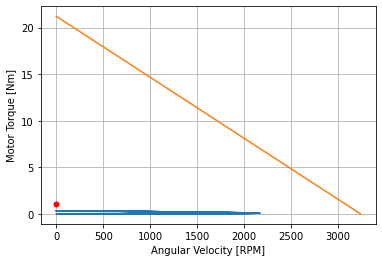

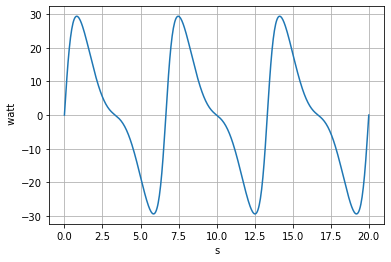

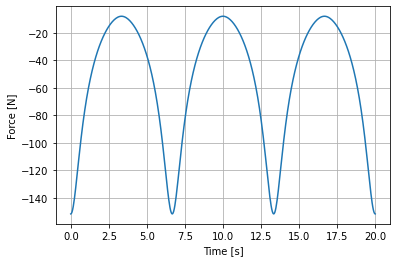

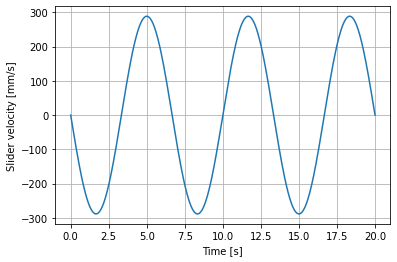

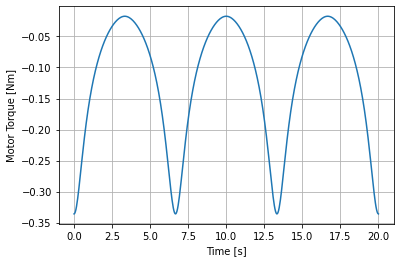

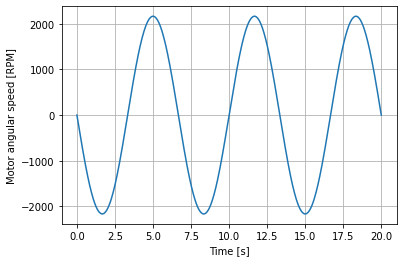

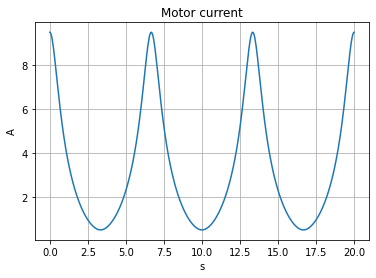

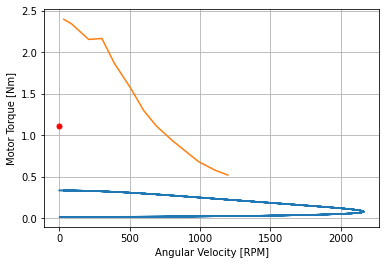

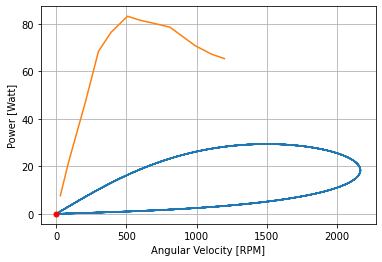

In [18]:

plt.figure(1)
plt.plot(abs(motorSpeed), abs(motorTorque))
plt.plot(motorSpeedBarang, motorTorqueBarang)
#plt.plot(stepper_motor_spec[:,0], stepper_motor_spec[:,1])
plt.plot(0, 1.1070999437878177, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
#plt.title('Load Trajectory')
plt.ylabel('Motor Torque [Nm]')
plt.xlabel('Angular Velocity [RPM]')
plt.grid(True)

'''plt.figure(2)
plt.plot(abs(motorTorque), abs(motorSpeed))
#plt.plot(motorTorqueBarang, motorSpeedBarang)
plt.plot(stepper_motor_spec[:,0], stepper_motor_spec[:,1])
#plt.title('Load Trajectory')
plt.ylabel('Motor Torque [Nm]')
plt.xlabel('Angular Velocity [RPM]')
plt.grid(True)'''

motorSpeedSI = motorSpeed*2*np.pi/60
print(max(abs(motorTorque)))
plt.figure(2)
plt.plot(timeVel, np.multiply((motorTorque), (motorSpeedSI)))
#plt.title('motor Power')
plt.ylabel(' watt')
plt.xlabel('s')
plt.grid(True)

plt.figure(3)
plt.plot(timeForce, sliderForce)
#plt.title('slider Force')
plt.ylabel('Force [N]')
plt.xlabel('Time [s]')
plt.grid(True)

plt.figure(4)
plt.plot(timeVel, sliderVelocity)
#plt.title('slider velocity')
plt.ylabel('Slider velocity [mm/s]')
plt.xlabel('Time [s]')
plt.grid(True)

plt.figure(5)
plt.plot(timeForce, motorTorque)
#plt.title('slider Force')
plt.ylabel('Motor Torque [Nm]')
plt.xlabel('Time [s]')
plt.grid(True)

plt.figure(6)
plt.plot(timeVel, motorSpeed)
#plt.title('slider velocity')
plt.ylabel('Motor angular speed [RPM]')
plt.xlabel('Time [s]')
plt.grid(True)

motorCurrent = motorTorque*9*np.pi
plt.figure(7)
plt.plot(timeVel, abs(motorCurrent))
plt.title('Motor current')
plt.ylabel('A')
plt.xlabel('s')
plt.grid(True)

plt.figure(8)
plt.plot(abs(motorSpeed), abs(motorTorque))
#plt.plot(motorTorqueBarang, motorSpeedBarang)
plt.plot(stepper_motor_spec[:,0], stepper_motor_spec[:,1]) #R/m * 1 m/60 s * 2pi rad/1 R (2pi/60)
#plt.title('Load Trajectory')
plt.plot(0, 1.1070999437878177, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.ylabel('Motor Torque [Nm]')
plt.xlabel('Angular Velocity [RPM]')
plt.grid(True)

plt.figure(9)
plt.plot(abs(motorSpeed), abs(motorTorque)*abs(motorSpeed)*2*np.pi/60)
#plt.plot(motorSpeedBarang, motorSpeedBarang*motorTorqueBarang*2*np.pi/60)
plt.plot(stepper_motor_spec[:,0], stepper_motor_spec[:,1]*stepper_motor_spec[:,0]*2*np.pi/60) #R/m * 1 m/60 s * 2pi rad/1 R (2pi/60)
#plt.title('Load Trajectory')
plt.plot(0, 1.1070999437878177*0, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.ylabel('Power [Watt]')
plt.xlabel('Angular Velocity [RPM]')
plt.grid(True)

plt.show()


In [13]:
# Packages and adjustments to the figures
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math


In [14]:
'''
# Generate a signal
samplingFreq = 1000 # sampled at 1 kHz = 1000 samples / second
tlims = [0,1]        # in seconds
signalFreq = [2,50] # Cycles / second
signalMag = [1,0.2] # magnitude of each sine
t = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)
y = signalMag[0]*np.sin(2*math.pi*signalFreq[0]*t) + signalMag[1]*np.sin(2*math.pi*signalFreq[1]*t)

# Compute the Fourier transform
yhat = np.fft.fft(y)
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq); # the frequencies in cycles/s

# Plot the signal
plt.figure(1)
plt.plot(t,y)
plt.ylabel('y(t)')
plt.xlabel('t(s)')
#plt.xlim([min(t),max(t)])

# Plot the power spectrum
plt.figure(2)
plt.plot(fcycles,np.absolute(yhat))
plt.xlim([-100,100])
plt.xlabel('omega (cycles/s)')
plt.ylabel('y hat')
plt.show()'''

"\n# Generate a signal\nsamplingFreq = 1000 # sampled at 1 kHz = 1000 samples / second\ntlims = [0,1]        # in seconds\nsignalFreq = [2,50] # Cycles / second\nsignalMag = [1,0.2] # magnitude of each sine\nt = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)\ny = signalMag[0]*np.sin(2*math.pi*signalFreq[0]*t) + signalMag[1]*np.sin(2*math.pi*signalFreq[1]*t)\n\n# Compute the Fourier transform\nyhat = np.fft.fft(y)\nfcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq); # the frequencies in cycles/s\n\n# Plot the signal\nplt.figure(1)\nplt.plot(t,y)\nplt.ylabel('y(t)')\nplt.xlabel('t(s)')\n#plt.xlim([min(t),max(t)])\n\n# Plot the power spectrum\nplt.figure(2)\nplt.plot(fcycles,np.absolute(yhat))\nplt.xlim([-100,100])\nplt.xlabel('omega (cycles/s)')\nplt.ylabel('y hat')\nplt.show()"